<a href="https://colab.research.google.com/github/mustafadanabasi/Python_LinearRegression_EvFiyatlari/blob/main/EvFiyatlarlari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(89, 3)
[[   26.41674813 10752.10328482 17484.26226585]]
[3071.84688281]
Modelin Tahmini:  [[68477.06384363]]
Hesaplanan Fiyat :  68477.06384830001
Hesaplanan Fiyat Alanlar :  68477.06384362813
Ortalama Karek Hatası: 489771784.10571
Ortalama Mutlak Hata (MAE): 17624.56128897201
Ortalama Karesel Hata (MSE): 489771784.10571
Kök Ortalama Karesel Hata (RMSE): 22130.78814922121


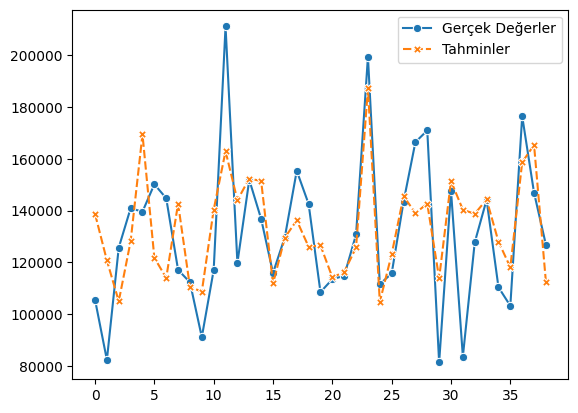

In [61]:
# Kulanıcılacak kütüphaneler import edilir
import pandas as pd # verilere erişim sağlamak ve okumak için kullanılan kütüphane
import numpy as np # Çok boyutlu diziler üzerinde matematiksel işlemleri yapabilmek için kütüphane
import matplotlib.pyplot as plt # Grafik oluşturmak ve görselleştirmek için kullanılan kütüphane
import seaborn as sns # Grafik oluşturmak ve görselleştirmek için kullanılan kütüphane
from sklearn.model_selection import train_test_split  # Veri setini eğitim ve test olarak bölmek için kullanılan kütüphane

EvFiyatlari = pd.read_csv("evfiyatlari.csv") # pandas kütüphanesini kullanarak csv dosyasından verileri okumak
#EvFiyatlari.head() # 5 row gösterir
EvFiyatlari.head(10) # 10 row gösterir. İlk index 0 oluyor.
#EvFiyatlari.info() # okunan veri hakkında bilgi verir. Row sayısı, colon sayısı gibi bilgiler
#print(EvFiyatlari.shape)
#sns.pairplot(EvFiyatlari) verileri grafik olarak verir. Veri dağılımlarını hızlı bir şekilde görmemizi sağlar.
X = EvFiyatlari[["MetreKare", "YatakOdasi","Banyo"]] # Bağımsız değişkenler
y = EvFiyatlari[["Fiyat"]] # Bağımlı değişken

# Oluşturacağımız makine öğrenmesi modelinin başarısını tespit etmek için elimizdeki verilerin bir kısmını test için ayırmamız gerekiyor.
# Bunun için sklearn kütüphanesi kullanılıyor. Aşağıda %30 test verisi, %70 eğitim verisi olarak ayrılmıştır.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Bağımsız değişkenimiz X x_train ve x_test için, Bağımlı değişkenimiz Y için y_train, y_train isminde parçalara ayırıyoruz.

# veri setlerinin uzunlukları kontrol ediliyor
print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)
from sklearn.linear_model import LinearRegression # sklearn kütüphanesinden LinearRegression sınıfı import ediliyor
model = LinearRegression()
model.fit(x_train, y_train) # Eğitim verilerini kullanarak model eğitimi yapılıyor
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  # Eğitim verilerini kullanarak model eğitimi yapılıyor

print(model.coef_) # print(model.coef_) modelin doğrusal denklemini görmek için kullanılır. Modelin bağımsız değişkenler (X) (feature'lar) için katsayılarını verir. [[   26.41674813(MetreKare) 10752.10328482 (YatakOdasi) 17484.26226585(Banyo)]]
# model.intercept_ modelin doğrusal denklemini görmek için kullanılır. Modelin sabit terimini (intercept) verir.
# 0.4476710369574589
print(model.intercept_)
# formul > y = mx + n
# fiyat = (X1 * X1Coef) + (X2 * X2Coef ) + (X3 * X3Coef) + intercept
#print(model.score(x_train, y_train)) # Eğitim verilerinin doğruluğu kontrol ediliyor
modelTahmin = model.predict(pd.DataFrame([[1000, 2, 1]], columns=x_train.columns))
hesaplananFiyat = (1000 * 26.41674813) + (2 * 10752.10328482) + (1 * 17484.26226585) + 3071.84688281
hesaplananFiyat1 = (1000 * model.coef_[0,0]) + (2 * model.coef_[0,1]) + (1 * model.coef_[0,2]) + model.intercept_[0]
print("Modelin Tahmini: " ,modelTahmin)
print("Hesaplanan Fiyat : " ,hesaplananFiyat)
print("Hesaplanan Fiyat Alanlar : " ,hesaplananFiyat1)
tahminler = model.predict(x_test) # Test verileri üzerinde tahmin yapılıyor
#print(tahminler)
tahmin_ve_sonuclar = pd.DataFrame({"Gerçek Değerler": y_test.values.reshape(-1,),"Tahminler": tahminler.reshape(-1,) }) # Tahmin sonuçlarını ve  gerçek değerlerini yanyana yer alacağı bir formata getirme
#tahmin_ve_sonuclar = pd.DataFrame({"Gerçek Değerler": y_test.values.reshape(-1,),"Tahmin": tahminler.flatten() })
tahmin_ve_sonuclar.head() # tahmin ve sonuç tablosu gösterir

# Yaptığımız tahminler ile gerçek fiyatların durumunu görmek için grafik çizdirme
sns.lineplot(data=tahmin_ve_sonuclar, markers=True)

# Sonuçları sadece görsel olarak görmek çoğu zaman yeterli değildir. Yaptığımız tahminlerin hata değerini de hesaplamak gerekiyor.

from sklearn import metrics
hataDegeri = metrics.mean_squared_error(y_test.values.reshape(-1,), tahminler.reshape(-1,))
print("Ortalama Karek Hatası:", hataDegeri)
print("Ortalama Mutlak Hata (MAE):", metrics.mean_absolute_error(y_test, tahminler))
print("Ortalama Karesel Hata (MSE):", metrics.mean_squared_error(y_test, tahminler))
print("Kök Ortalama Karesel Hata (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, tahminler)))

